<a href="https://colab.research.google.com/github/jmdelahanty/Analyzing_Neural_Time_Series/blob/master/2024_02_06_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 0:   Getting the correlation matrix and its eigenvalues for a 2D data set**


Before proceeding with PCA, we first calculate the correlation matrix for a 2D data set ($n=1000$), as what was done briefly in class, and obtain the corresponding variances $\sigma_{ii}$ of the dataset.

Instructions

(0) Plot the data.\
(1) Recenter the mean of the dataset to zero.\
(2) Plot the recentered data in 2D.\
(3) Calculate the covariance matrix, $C=n^{-1} X^T X$.\
(4) Diagonalize and obtain the eigenvalues and eigenvectors of the covariance matrix. Use: EigValues, EigVectors = np.linalg.eig(C)


Questions:\
(1) What is the variance of each of the dimensions?\
(2) How do you interpret the eigenvectors obtained from the calculation?


In [ ]:
import pandas as pd
import numpy as np
import random
from random import randrange
import matplotlib.pyplot as plt

In [ ]:
#generating the data set
n = 10000
mean = (-1, 2)
cov = [[8, 2.5], [2.5, 2]]
X = np.random.multivariate_normal(mean, cov, n)

**Part 1: PCA on 1D signal** \\
We can use PCA on a set of data if each can be viewed as a vector. The first data set contains 200 elements. To gain some intuition, you can think of them as a variable being repeatedly measured over a set period of time. For this exercise, we can just treat them as dimensionless vectors. \\
Let’s perform PCA on this data set(try to use at least 10 components).

Tasks:\
(1) Plot one dataset.\
(2) Perform PCA (at least 10 dimensions) on the data set using the PCA library from sklearn.decomposition. Calculate the eigenvalues and the first 3 eigenvectors. (Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) \
(3) Plot the eigenvalue spectrum and the first 3 eigenvectors.


Questions
What do you observe? \\
Are the eigenvectors interpretable? \\
What is the intrinsic dimensionality of the variation in the data?

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 22 16:23:26 2022

@author: liang
"""

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from random import randrange
from sklearn.preprocessing import StandardScaler



#function to read 1D csv files from a URL and output np arrays
def readURLCSV(url):
    dataRead = pd.read_csv(url)
    data=np.array(dataRead)
    return data

#performing the PCA
def doPCA(componentsNo, data):
    pca = PCA(componentsNo)
    dataInPCABasis = pca.fit_transform(data)
    return pca, dataInPCABasis

In [ ]:
#scripts
url='https://github.com/wavted/JHUSciML/blob/55df0b79d0f01486c10e9b5fc38f2a82e63e7e90/part1Data1D.csv?raw=true'
data=readURLCSV(url)

n_components=10 #number of PCA components to calculate
pca,dataInPCABasis=doPCA(n_components,data)
eigenVectorArray=pca.components_
eigenValueArray=pca.explained_variance_

**Part 2: PCA on noisier 1D signal** \\
We can repeat part 1 and use another data set. \\
Plot the first 3 eigenvectors and all the eigenvalues. Compare them with the graphs from part 1. \\
What do you observe? \\
Are the eigenvectors interpretable? \\
What is the intrinsic dimensionality of the variation in the data? \\

In [ ]:
#data for part2
url='https://github.com/wavted/JHUSciML/blob/55df0b79d0f01486c10e9b5fc38f2a82e63e7e90/part2Data1D.csv?raw=true'
data=readURLCSV(url)

**Part 3: PCA on hand writing digits (MNIST)** \\
Around 1000 handwritten digits are selected from the MNIST data set and converted into vector form. They are 28*28 pixel gray scale images each converted to a vector with 784 elements. This is what they look like in image form:

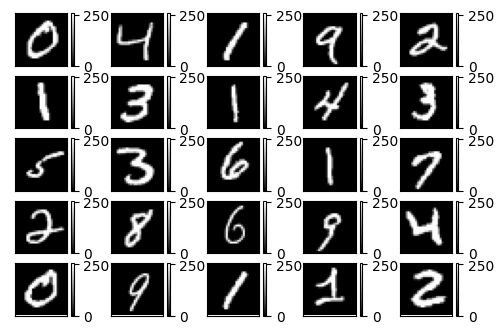

Use PCA (with at least n=30 dimensions) to extract information and reduce the dimensionality of the dataset. Calculate the following:\
(1) The first few eigenvectors and all the eigenvalues (i.e., generate a plot of the spectrum of eigenvalues).\
(2) Make a scatter plot of all the elements using the first two eigenvectors as basis (for each digit).

From here, answer the following questions:\
(1) What do you observe? Are the eigenvectors interpretable?\
(2) What is the intrinsic dimensionality of the variation in the data?\
(3) How do you propose to perform classification?\
(4) What is needed to improve the performance?

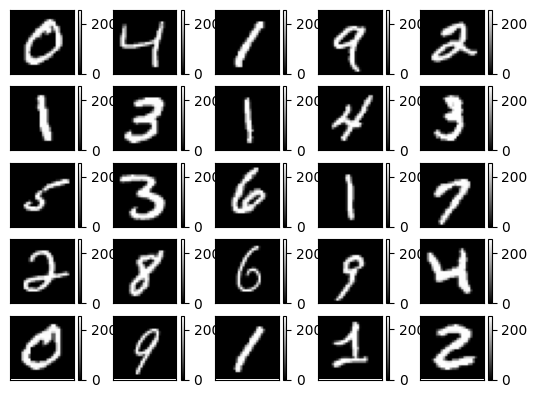

In [ ]:
"""
Created on Thu Sep 22 16:23:26 2022

@author: liang
"""

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from random import randrange
from sklearn.preprocessing import StandardScaler

#function to read MNIST files from a URL and output np arrays
def readURLMnist(url):
    mnistImport = pd.read_csv(url)
    mnist=np.array(mnistImport)
    mnistData=mnist[:,1:785]
    mnistDigit=mnist[:,0]
    return mnistData, mnistDigit

def doPCA(componentsNo, data):
    pca = PCA(componentsNo)
    dataInPCABasis = pca.fit_transform(data)
    return pca, dataInPCABasis

#Part 3 Starts:
def plotWritingAsImg(mnistDataSubSet):
    imageCount=min(len(mnistDataSubSet),25)
    fig=plt.figure(randrange(10000),dpi=100)
    for digit_num in range(0,imageCount):
        plt.subplot(5,5,digit_num+1)
        mat_data = mnistDataSubSet[digit_num].reshape(28,28)
        im=plt.imshow(mat_data,cmap='gray')
        fig.colorbar(im)
        plt.xticks([])
        plt.yticks([])

#Part 3 script
url='https://github.com/wavted/JHUSciML/blob/9242f084bc2160ce79e7cb9a64f8e375c87a08f2/mnist_First1k.csv?raw=true'
mnistData,mnistDigit=readURLMnist(url)
plotWritingAsImg(mnistData)

#performing PCA
n_components=30
pca,dataInPCABasis=doPCA(n_components,mnistData)

eigenVectorArray=pca.components_
eigenValueArray=pca.explained_variance_

In [ ]:
x = np.zeros((10,len(mnistData)))
y = np.zeros((10,len(mnistData)))

for i in range(len(mnistData)):
  x[mnistDigit[i],i] = np.dot(eigenVectorArray[0],mnistData[i])
  y[mnistDigit[i],i] = np.dot(eigenVectorArray[1],mnistData[i])

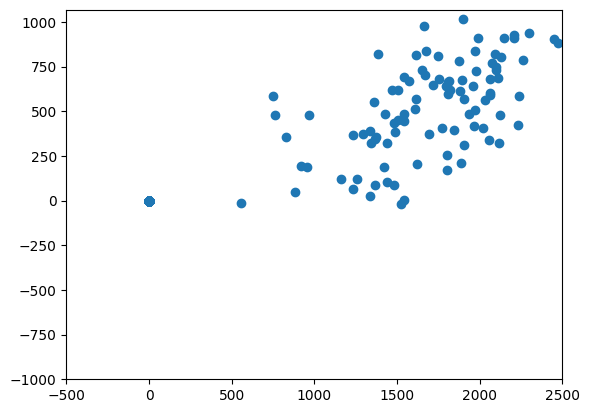

In [ ]:
plt.scatter(x[0],y[0])
plt.xlim(-500,2500)
plt.ylim(-1000.1500)
plt.show()

**Part 4: PCA on shuffled pixels**

Repeating the steps in Part 3, but we shuffle the pixels on the images(need to shuffle all the vectors the same way, i.e. if the first element of the first vector gets moved to the 8th position, the first element of every vector needs to be moved to the 8th position).

Tasks:\
Make the same plots as part 3.

Questions:\
What do you observe?\
Are the eigenvectors interpretable?\
Is PCA affected by shuffling?

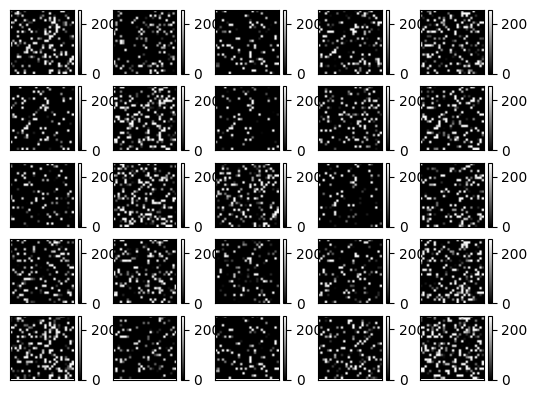

In [ ]:
#Part 4 Starts:
def shuffleImageArray(dataInput):
    randIndex=np.arange(0,784)
    restorationIndex=[]
    random.shuffle(randIndex)

    return dataInput[:,randIndex]

data=mnistData
randomizedData=shuffleImageArray(data)
plotWritingAsImg(randomizedData)

In [ ]:
#Performing PCA
n_components=30
pca,dataInPCABasis=doPCA(n_components,randomizedData)

eigenVectorArray=pca.components_
eigenValueArray=pca.explained_variance_

In [ ]:
x = np.zeros((10,len(randomizedData)))
y = np.zeros((10,len(randomizedData)))

for i in range(len(mnistData)):
  x[mnistDigit[i],i] = np.dot(eigenVectorArray[0],randomizedData[i])
  y[mnistDigit[i],i] = np.dot(eigenVectorArray[1],randomizedData[i])

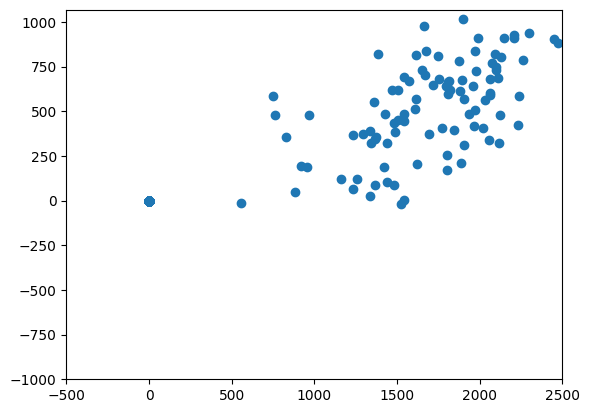

In [ ]:
plt.scatter(x[0],y[0])
plt.xlim(-500,2500)
plt.ylim(-1000.1500)
plt.show()